## Prodigy Internship Task

**Name:** : Aditya Pulikal <br>
**Task:** : Machine Learning : House Prediction using Regression Techniques

**Importing libraries**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Importing data**

In [2]:
df = pd.read_csv('ames_housing.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


**EDA**

In [3]:
# OVERVIEW OF THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
# CHECK FOR NULL VALUES
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [5]:
# CHECK FOR DUPLICATE VALUES
df.duplicated().sum()

0

In [6]:
# DESCRIBE DATA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.000000,0.00,1474.0


<Axes: xlabel='YrSold', ylabel='SalePrice'>

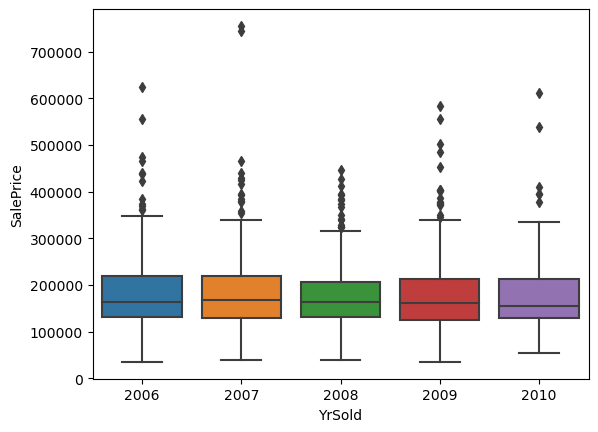

In [7]:
sns.boxplot(data = df, x = 'YrSold', y = 'SalePrice' )

C:\Users\Aditya\AppData\Local\Temp\ipykernel_3520\776999942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

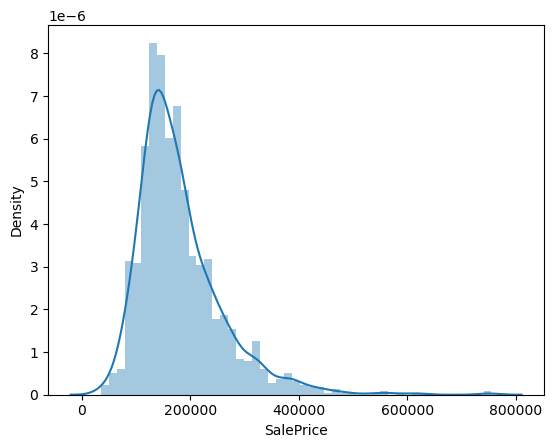

In [8]:
# SALES DISTRIBUTION
sns.distplot(df['SalePrice'])

Text(0.5, 1.0, 'Distribution of Sale Condition')

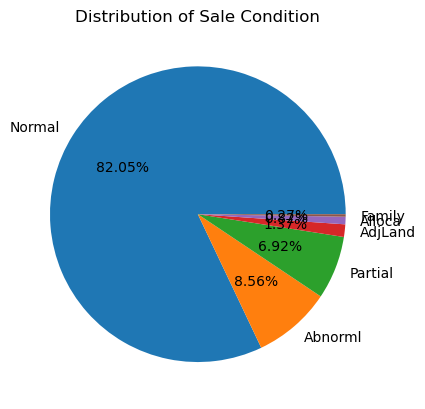

In [9]:
# DISTRIBUTION OF SALES CONDITION
plt.pie(df['SaleCondition'].value_counts(),labels = ['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],autopct = '%.2f%%')
plt.title('Distribution of Sale Condition')

**Numeric data**

In [10]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


**Feature Engineering**

In [11]:
# Calculate correlation with SalePrice
correlation_matrix = df_num.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Select features with high correlation (absolute value > 0.5)
selected_features = correlation_with_target[abs(correlation_with_target) > 0.5]
print(f"Selected Features Based on Correlation:\n{selected_features}")

Selected Features Based on Correlation:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Define target and features
X = df_num.drop(columns=['SalePrice'])
y = df_num['SalePrice']

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10)
print(f"Top Features Based on Feature Importance:\n{top_features}")

Top Features Based on Feature Importance:
OverallQual    0.585512
GrLivArea      0.111939
TotalBsmtSF    0.040937
2ndFlrSF       0.034499
BsmtFinSF1     0.033201
1stFlrSF       0.027420
GarageCars     0.027040
GarageArea     0.016116
LotArea        0.015083
YearBuilt      0.012551
dtype: float64


**Regression using the top 5 most important features**

In [21]:
# Use selected features
important_features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageCars']
X = df_num[important_features]
y = df_num['SalePrice']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)
print("R2 score:",round(r2_score(y_test,y_pred)*100,4),'%')


R2 score: 79.1983 %


In [22]:
# Train the Catboost Regressor model
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

# Evaluate the model
y_pred_cat = cat.predict(X_test)
print("Testing acc:",round(r2_score(y_test,y_pred_cat)*100,4),'%')

Learning rate set to 0.04196
0:	learn: 75119.8319838	total: 1.14ms	remaining: 1.14s
1:	learn: 72954.8912196	total: 2.56ms	remaining: 1.28s
2:	learn: 70963.3238435	total: 4.04ms	remaining: 1.34s
3:	learn: 69005.4043230	total: 5.6ms	remaining: 1.39s
4:	learn: 67106.3783601	total: 7.14ms	remaining: 1.42s
5:	learn: 65309.9419826	total: 8.5ms	remaining: 1.41s
6:	learn: 63690.0934668	total: 9.98ms	remaining: 1.42s
7:	learn: 62028.5705504	total: 11.3ms	remaining: 1.4s
8:	learn: 60648.3433951	total: 12.6ms	remaining: 1.39s
9:	learn: 59141.8924896	total: 13.9ms	remaining: 1.37s
10:	learn: 57768.9244816	total: 15.1ms	remaining: 1.35s
11:	learn: 56466.2327164	total: 16.3ms	remaining: 1.34s
12:	learn: 55213.1700651	total: 17.4ms	remaining: 1.32s
13:	learn: 53989.2276246	total: 18.8ms	remaining: 1.33s
14:	learn: 52785.2591702	total: 20.2ms	remaining: 1.32s
15:	learn: 51742.2176816	total: 20.9ms	remaining: 1.28s
16:	learn: 50644.9048988	total: 22.2ms	remaining: 1.28s
17:	learn: 49608.0753825	total: 

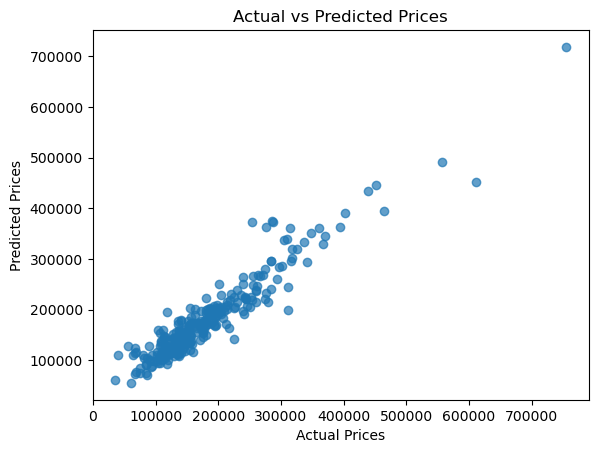

In [23]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred_cat, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()